In [6]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import scipy.stats as stats
from sklearn import *
from sklearn.neighbors.kde import KernelDensity
data = df = pd.read_csv('data.csv', delimiter=',')
data

,L1_S24_F1844,L1_S24_F1846,Response
0,-0.123,0.111,0
1,-0.269,0.175,0
2,-0.058,0.141,0
3,0.136,-0.145,0
4,0.045,-0.094,0
5,-0.152,0.181,0
6,0.233,0.045,0
7,0.327,-0.193,0
8,-0.020,-0.097,0
9,-0.029,0.122,0


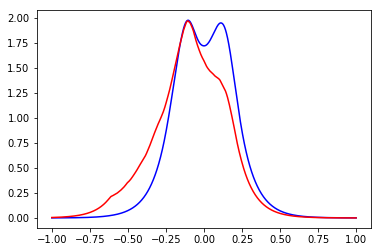

In [13]:
i0 = data['Response']==0
kde0 = KernelDensity(kernel='exponential', bandwidth=0.1).fit(data.loc[i0,'L1_S24_F1846'].values.reshape(-1, 1))
X_plot = np.linspace(-1, 1, 1000).reshape(-1, 1)
Dens0 = np.exp(kde0.score_samples(X_plot))  #score_samples возвращает логарифм плотности
fig, ax = plt.subplots()
ax.plot(X_plot, Dens0, color='blue')

i0 = data['Response']==1
kde0 = KernelDensity(kernel='exponential', bandwidth=0.1).fit(data.loc[i0,'L1_S24_F1846'].values.reshape(-1, 1))
X_plot = np.linspace(-1, 1, 1000).reshape(-1, 1)
Dens0 = np.exp(kde0.score_samples(X_plot))  #score_samples возвращает логарифм плотности
ax.plot(X_plot, Dens0, color='red')

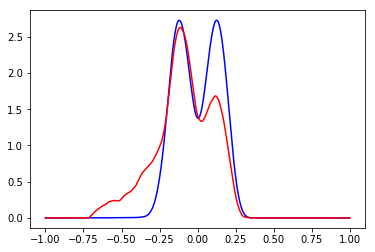

In [9]:
i0 = data['Response']==0
kde0 = KernelDensity(kernel='epanechnikov', bandwidth=0.1).fit(data.loc[i0,'L1_S24_F1846'].values.reshape(-1, 1))
X_plot = np.linspace(-1, 1, 1000).reshape(-1, 1)
Dens0 = np.exp(kde0.score_samples(X_plot))  #score_samples возвращает логарифм плотности
fig, ax = plt.subplots()
ax.plot(X_plot, Dens0, color='blue')

i0 = data['Response']==1
kde0 = KernelDensity(kernel='epanechnikov', bandwidth=0.1).fit(data.loc[i0,'L1_S24_F1846'].values.reshape(-1, 1))
X_plot = np.linspace(-1, 1, 1000).reshape(-1, 1)
Dens0 = np.exp(kde0.score_samples(X_plot))  #score_samples возвращает логарифм плотности
ax.plot(X_plot, Dens0, color='red')

In [14]:
dataTrain = data.loc[0:data.shape[0]/2,].reset_index(drop=True)
dataTest = data.loc[data.shape[0]/2:data.shape[0],].reset_index(drop=True)
r = 0
kde0 = KernelDensity(kernel='epanechnikov', bandwidth=0.05)
kde0.fit(dataTrain.loc[dataTrain['Response']==r,'L1_S24_F1846'].values.reshape(-1, 1))
logProbability0 = kde0.score_samples(dataTest.loc[dataTest['Response']==r,'L1_S24_F1846'].values.reshape(-1, 1))
logProbability0[np.isinf(logProbability0)] = -100 # заменяем -бесконечность
logLikehood0 = logProbability0.sum()
print(logLikehood0)

21997.533371007397


In [18]:
r = 1
kde1 = KernelDensity(kernel='epanechnikov', bandwidth=0.05)
kde1.fit(dataTrain.loc[dataTrain['Response']==r,'L1_S24_F1846'].values.reshape(-1, 1))
logProbability1 = kde1.score_samples(dataTest.loc[dataTest['Response']==r,'L1_S24_F1846'].values.reshape(-1, 1))
logProbability1[np.isinf(logProbability1)] = -100 # заменяем -бесконечность
logLikehood1 = logProbability1.sum()
print(logLikehood1)

114.4397533781688


In [19]:
predictionProbXafter0 =np.exp(kde0.score_samples(dataTest['L1_S24_F1846'].values.reshape(-1, 1)))
predictionProbXafter1 =np.exp(kde1.score_samples(dataTest['L1_S24_F1846'].values.reshape(-1, 1)))

In [20]:
predictionProbXafter0

array([1.64960241, 2.83545754, 3.20566151, ..., 3.28127197, 2.73217811,
       3.4162938 ])

In [22]:
predictionProbXafter1

array([1.06668493, 1.73026027, 1.79120548, ..., 1.78497945, 2.21531507,
       3.42961644])

In [ ]:
predictionProb0afterX = 